In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
Conv2D = Convolution2D

In [5]:
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [23]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(32, (3, 3), input_shape=(64,64,3), activation='relu'))

In [26]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(units=128, activation='relu'))

In [29]:
model.add(Dense(units=7, activation='softmax'))

In [30]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
import matplotlib.pyplot as plt

In [33]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True)

In [34]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
training_set = train_datagen.flow_from_directory('C:\\Users\\pc\\AI python\\skin diseases\\dataset\\training set',
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 127 images belonging to 7 classes.


In [36]:
test_set = test_datagen.flow_from_directory('C:\\Users\\pc\\AI python\\skin diseases\\dataset\\test set',
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 93 images belonging to 7 classes.


In [37]:
from IPython.display import display

In [38]:
from keras.preprocessing.image import ImageDataGenerator

In [70]:
model.fit_generator(
    training_set,
    epochs=10)

Epoch 1/10
4/4 [==============================] - 2s 513ms/step - loss: 0.0646 - acc: 0.9843
Epoch 2/10
4/4 [==============================] - 2s 539ms/step - loss: 0.0441 - acc: 1.0000
Epoch 3/10
4/4 [==============================] - 2s 513ms/step - loss: 0.0602 - acc: 1.0000
Epoch 4/10
4/4 [==============================] - 2s 533ms/step - loss: 0.0529 - acc: 0.9921
Epoch 5/10
4/4 [==============================] - 2s 523ms/step - loss: 0.0648 - acc: 0.9921
Epoch 6/10
4/4 [==============================] - 2s 522ms/step - loss: 0.0531 - acc: 1.0000
Epoch 7/10
4/4 [==============================] - 2s 534ms/step - loss: 0.0421 - acc: 1.0000
Epoch 8/10
4/4 [==============================] - 2s 541ms/step - loss: 0.0525 - acc: 1.0000
Epoch 9/10
4/4 [==============================] - 2s 540ms/step - loss: 0.0438 - acc: 0.9921
Epoch 10/10
4/4 [==============================] - 2s 551ms/step - loss: 0.0380 - acc: 1.0000


In [71]:
model.save('MelDermatx.h5')

In [97]:
import numpy as np

In [98]:
from IPython.display import Image

In [99]:
from tensorflow.keras.preprocessing import image

In [161]:
test_image = image.load_img('C:\\Users\\pc\\AI python\\skin diseases\\dataset\\test set\\bacterial infection\\46.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

In [162]:
result = model.predict(test_image)

In [163]:
training_set.class_indices

{'auto immune disease': 0,
 'bacterial infection': 1,
 'eczema': 2,
 'fungal yeast infection': 3,
 'miscellaneous skin diseases': 4,
 'parasitic infection': 5,
 'viral infection': 6}

In [164]:
import json

In [165]:
with open('treatments.json') as treatment:
  data = json.load(treatment)

In [166]:
data['treatments'][1]

{'bacterial infection': 'Treatments are antibiotics like pencillin, fluconazole, miconazole, metronidazole, ciprofloxacillin, Amoxyclav.'}

bacterial infection
Treatments are antibiotics like pencillin, fluconazole, miconazole, metronidazole, ciprofloxacillin, Amoxyclav.


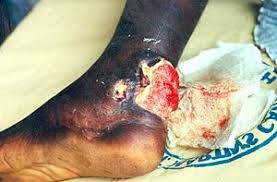

In [169]:
if result[0][0] ==1:
    prediction = 'auto immune disease'
    treatment = data['treatments'][0]['auto immune disease']
elif result[0][1] == 1:
    prediction = 'bacterial infection'
    treatment = data['treatments'][1]['bacterial infection']
elif result[0][2] == 1:
    prediction = 'eczema'
    treatment = data['treatments'][2]['eczema']
elif result[0][3] == 1:
    prediction = 'fungal yeast infection'
    treatment = data['treatments'][3]['fungal yeast infection']
elif result[0][4] == 1:
    prediction = 'miscellaneous skin diseases'
    treatment = data['treatments'][4]['miscellaneous skin diseases']
elif result[0][5] == 1:
    prediction = 'parasitic infection'
    treatment = data['treatments'][5]['parasitic infection']
else:
    prediction = 'viral infection'
    treatment = data['treatments'][6]['viral infection']
print(prediction)
print(treatment)
Image('C:\\Users\\pc\\AI python\\skin diseases\\dataset\\test set\\bacterial infection\\46.jpg')
